In [3]:
# from scikitlearn import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
mpft1 = pd.read_csv("../data/most_params_fixed_test_1.csv")

In [5]:
mpft1.head()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,p_mkcat,p_mKm,Kinase in Solution,Phosphatase in Solution,Average Body X,Average Node 1 X,Average Node 2 X,Average Node 3 X,Average Node 4 X,Average All Nodes X
0,801.339496,222.798458,0.01,0.5,3.0,0.2,0.080877,0.314388,0.232072,0.013982,...,15.0,0.5,675,1,3.088935e-01,9.837016e-01,1.372128e-03,6.699978e-01,0.157103,0.453044
1,958.425121,658.259311,0.01,0.5,3.0,0.2,0.019515,0.233487,0.175991,0.062379,...,15.0,0.5,956,79,6.070308e-08,1.159683e-01,5.044409e-20,3.402380e-20,0.000011,0.028995
2,248.877055,181.709942,0.01,0.5,3.0,0.2,0.033716,0.227451,0.077833,0.056593,...,15.0,0.5,217,13,9.122777e-02,9.452934e-01,8.154889e-01,3.978322e-02,0.981594,0.695540
3,992.470251,415.608226,0.01,0.5,3.0,0.2,0.082132,0.210216,0.383683,0.052641,...,15.0,0.5,818,19,3.245002e-01,5.770488e-01,8.997297e-09,4.099621e-05,0.357006,0.233524
4,393.682573,969.945764,0.01,0.5,3.0,0.2,0.056302,0.310025,0.449974,0.081443,...,15.0,0.5,389,101,9.222683e-03,3.094988e-12,1.691276e-18,2.153832e-14,0.008535,0.002134


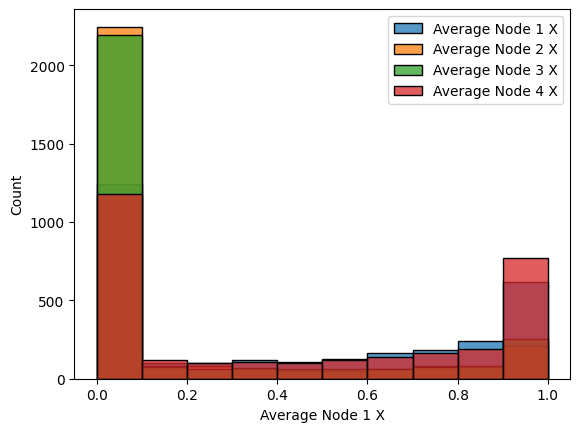

In [16]:
sns.histplot(mpft1['Average Node 1 X'], label='Average Node 1 X', bins=10)
sns.histplot(mpft1['Average Node 2 X'], label='Average Node 2 X', bins=10)
sns.histplot(mpft1['Average Node 3 X'], label='Average Node 3 X', bins=10)
sns.histplot(mpft1['Average Node 4 X'], label='Average Node 4 X', bins=10)
plt.legend();

<Axes: >

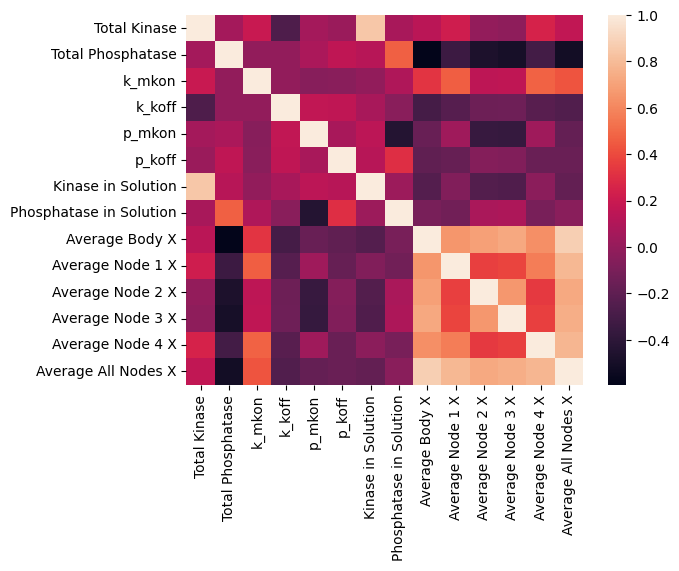

In [21]:
constant_columns = ["Timestep", "Patch Length", "dPIP", "alphaEnzyme", "k_mkcat", "k_mKm", "p_mkcat", "p_mKm"]
corr_matrix = mpft1.drop(columns=constant_columns).corr()
sns.heatmap(data=corr_matrix)

In [40]:
def feature_engineering(data):
    for i in range(1, 5):
        data['Polarization Index ' + str(i)] = (data['Average Node ' + str(i) + ' X'] / data['Average Body X'])
    for i in range(1, 5):
        data['Node ' + str(i) + ' is Polarized'] = (data['Polarization Index ' + str(i)] > 1.5).astype(int)
    node_cols = [f'Node {i} is Polarized' for i in range(1, 5)]
    data['Number of Polarized Nodes'] = data[node_cols].sum(axis=1)
    return data

In [41]:
processed_data = feature_engineering(mpft1)
processed_data.head()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,Average All Nodes X,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4,Node 1 is Polarized,Node 2 is Polarized,Node 3 is Polarized,Node 4 is Polarized,Number of Polarized Nodes
0,801.339496,222.798458,0.01,0.5,3.0,0.2,0.080877,0.314388,0.232072,0.013982,...,0.453044,3.184598e+00,4.442076e-03,2.169025e+00,0.508600,1,0,1,0,2
1,958.425121,658.259311,0.01,0.5,3.0,0.2,0.019515,0.233487,0.175991,0.062379,...,0.028995,1.910419e+06,8.309971e-13,5.604955e-13,173.502277,1,0,0,1,2
2,248.877055,181.709942,0.01,0.5,3.0,0.2,0.033716,0.227451,0.077833,0.056593,...,0.695540,1.036190e+01,8.939043e+00,4.360867e-01,10.759816,1,1,0,1,3
3,992.470251,415.608226,0.01,0.5,3.0,0.2,0.082132,0.210216,0.383683,0.052641,...,0.233524,1.778270e+00,2.772663e-08,1.263365e-04,1.100173,1,0,0,0,1
4,393.682573,969.945764,0.01,0.5,3.0,0.2,0.056302,0.310025,0.449974,0.081443,...,0.002134,3.355843e-10,1.833822e-16,2.335364e-12,0.925384,0,0,0,0,0


<Axes: >

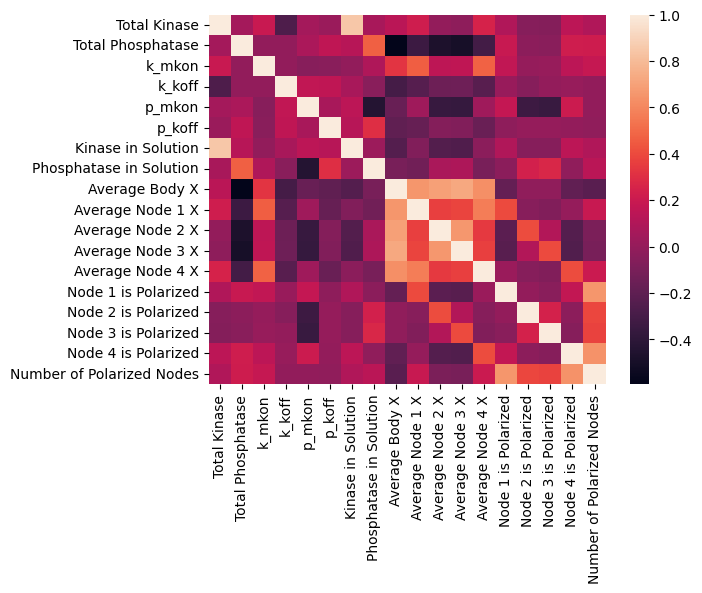

In [50]:
node_cols = [f'Polarization Index {i}' for i in range(1, 5)]
# avg_pIdx = [f'Average Node {i} X' for i in range(1, 5)]
columns_to_drop = constant_columns + node_cols + ["Average All Nodes X"]
corr_matrix_2 = processed_data.drop(columns=columns_to_drop).corr()
sns.heatmap(data=corr_matrix_2)